In [35]:
!pip install yfinance
!pip install yahoofinancials

In [36]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
%matplotlib inline

# time period
d1 = '2019-01-01'
d2 = '2025-05-16'

# Fetching data from yahoo finance
# List of Symbols : http://finance.yahoo.com/webservice/v1/symbols/allcurrencies/quote

eurusd_df = yf.download('EURUSD=X',
                      start=d1,
                      end=d2,
                      progress=False,
)

/tmp/ipython-input-3429997749.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eurusd_df = yf.download('EURUSD=X',


In [37]:
eurusd_df

Price,Close,High,Low,Open,Volume
Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X
Date,,,,,
2019-01-01,1.149306,1.155001,1.146500,1.149425,0
2019-01-02,1.146171,1.149700,1.134572,1.146132,0
2019-01-03,1.131811,1.140914,1.131734,1.131734,0
2019-01-04,1.139108,1.141774,1.134816,1.139095,0
2019-01-07,1.141044,1.147447,1.140524,1.141292,0
...,...,...,...,...,...
2025-05-09,1.122423,1.129114,1.119984,1.122423,0
2025-05-12,1.122965,1.124290,1.107506,1.122965,0


In [38]:
eurusd_df.columns = ['close','high','low','open','volume']

In [39]:
eurusd_df.drop(columns=['volume'], inplace=True)

In [40]:
eurusd_df

,close,high,low,open
Date,,,,
2019-01-01,1.149306,1.155001,1.146500,1.149425
2019-01-02,1.146171,1.149700,1.134572,1.146132
2019-01-03,1.131811,1.140914,1.131734,1.131734
2019-01-04,1.139108,1.141774,1.134816,1.139095
2019-01-07,1.141044,1.147447,1.140524,1.141292
...,...,...,...,...
2025-05-09,1.122423,1.129114,1.119984,1.122423
2025-05-12,1.122965,1.124290,1.107506,1.122965
2025-05-13,1.109558,1.117743,1.109668,1.109558


In [42]:
lags = range(7, 0, -1)
list(lags)

[7, 6, 5, 4, 3, 2, 1]

In [43]:
features = ['close', 'high', 'low', 'open']

In [44]:
for lag in lags:
    for column in features:
        eurusd_df[f"{column}_{lag}"] = eurusd_df[column].shift(lag)
eurusd_df

,close,high,low,open,close_7,high_7,low_7,open_7,close_6,high_6,...,low_3,open_3,close_2,high_2,low_2,open_2,close_1,high_1,low_1,open_1
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1.149306,1.155001,1.146500,1.149425,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,1.146171,1.149700,1.134572,1.146132,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.149306,1.155001,1.146500,1.149425
2019-01-03,1.131811,1.140914,1.131734,1.131734,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.149306,1.155001,1.146500,1.149425,1.146171,1.149700,1.134572,1.146132
2019-01-04,1.139108,1.141774,1.134816,1.139095,NaN,NaN,NaN,NaN,NaN,NaN,...,1.146500,1.149425,1.146171,1.149700,1.134572,1.146132,1.131811,1.140914,1.131734,1.131734
2019-01-07,1.141044,1.147447,1.140524,1.141292,NaN,NaN,NaN,NaN,NaN,NaN,...,1.134572,1.146132,1.131811,1.140914,1.131734,1.131734,1.139108,1.141774,1.134816,1.139095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-09,1.122423,1.129114,1.119984,1.122423,1.138926,1.139887,1.132708,1.138926,1.132490,1.134095,...,1.128121,1.131337,1.134276,1.137773,1.132708,1.134276,1.130621,1.133671,1.123608,1.130621
2025-05-12,1.122965,1.124290,1.107506,1.122965,1.132490,1.134095,1.126697,1.132490,1.129650,1.137864,...,1.132708,1.134276,1.130621,1.133671,1.123608,1.130621,1.122423,1.129114,1.119984,1.122423
2025-05-13,1.109558,1.117743,1.109668,1.109558,1.129650,1.137864,1.127523,1.129650,1.132323,1.136454,...,1.123608,1.130621,1.122423,1.129114,1.119984,1.122423,1.122965,1.124290,1.107506,1.122965


In [45]:
eurusd_df.dropna(axis=0, inplace=True)

In [46]:
eurusd_df

,close,high,low,open,close_7,high_7,low_7,open_7,close_6,high_6,...,low_3,open_3,close_2,high_2,low_2,open_2,close_1,high_1,low_1,open_1
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-10,1.155495,1.157140,1.151145,1.155522,1.149306,1.155001,1.146500,1.149425,1.146171,1.149700,...,1.140524,1.141292,1.147974,1.148633,1.142465,1.147934,1.145607,1.154015,1.144165,1.145725
2019-01-11,1.151013,1.153900,1.145974,1.151517,1.146171,1.149700,1.134572,1.146132,1.131811,1.140914,...,1.142465,1.147934,1.145607,1.154015,1.144165,1.145725,1.155495,1.157140,1.151145,1.155522
2019-01-14,1.146014,1.148369,1.145161,1.146276,1.131811,1.140914,1.131734,1.131734,1.139108,1.141774,...,1.144165,1.145725,1.155495,1.157140,1.151145,1.155522,1.151013,1.153900,1.145974,1.151517
2019-01-15,1.147289,1.149161,1.138615,1.147315,1.139108,1.141774,1.134816,1.139095,1.141044,1.147447,...,1.151145,1.155522,1.151013,1.153900,1.145974,1.151517,1.146014,1.148369,1.145161,1.146276
2019-01-16,1.141683,1.142231,1.137889,1.141409,1.141044,1.147447,1.140524,1.141292,1.147974,1.148633,...,1.145974,1.151517,1.146014,1.148369,1.145161,1.146276,1.147289,1.149161,1.138615,1.147315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-09,1.122423,1.129114,1.119984,1.122423,1.138926,1.139887,1.132708,1.138926,1.132490,1.134095,...,1.128121,1.131337,1.134276,1.137773,1.132708,1.134276,1.130621,1.133671,1.123608,1.130621
2025-05-12,1.122965,1.124290,1.107506,1.122965,1.132490,1.134095,1.126697,1.132490,1.129650,1.137864,...,1.132708,1.134276,1.130621,1.133671,1.123608,1.130621,1.122423,1.129114,1.119984,1.122423
2025-05-13,1.109558,1.117743,1.109668,1.109558,1.129650,1.137864,1.127523,1.129650,1.132323,1.136454,...,1.123608,1.130621,1.122423,1.129114,1.119984,1.122423,1.122965,1.124290,1.107506,1.122965


In [47]:
eurusd_df.drop(columns=['close', 'low','open'], inplace=True)

In [48]:
target = 'high'

In [49]:
eurusd_df

,high,close_7,high_7,low_7,open_7,close_6,high_6,low_6,open_6,close_5,...,low_3,open_3,close_2,high_2,low_2,open_2,close_1,high_1,low_1,open_1
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-10,1.157140,1.149306,1.155001,1.146500,1.149425,1.146171,1.149700,1.134572,1.146132,1.131811,...,1.140524,1.141292,1.147974,1.148633,1.142465,1.147934,1.145607,1.154015,1.144165,1.145725
2019-01-11,1.153900,1.146171,1.149700,1.134572,1.146132,1.131811,1.140914,1.131734,1.131734,1.139108,...,1.142465,1.147934,1.145607,1.154015,1.144165,1.145725,1.155495,1.157140,1.151145,1.155522
2019-01-14,1.148369,1.131811,1.140914,1.131734,1.131734,1.139108,1.141774,1.134816,1.139095,1.141044,...,1.144165,1.145725,1.155495,1.157140,1.151145,1.155522,1.151013,1.153900,1.145974,1.151517
2019-01-15,1.149161,1.139108,1.141774,1.134816,1.139095,1.141044,1.147447,1.140524,1.141292,1.147974,...,1.151145,1.155522,1.151013,1.153900,1.145974,1.151517,1.146014,1.148369,1.145161,1.146276
2019-01-16,1.142231,1.141044,1.147447,1.140524,1.141292,1.147974,1.148633,1.142465,1.147934,1.145607,...,1.145974,1.151517,1.146014,1.148369,1.145161,1.146276,1.147289,1.149161,1.138615,1.147315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-09,1.129114,1.138926,1.139887,1.132708,1.138926,1.132490,1.134095,1.126697,1.132490,1.129650,...,1.128121,1.131337,1.134276,1.137773,1.132708,1.134276,1.130621,1.133671,1.123608,1.130621
2025-05-12,1.124290,1.132490,1.134095,1.126697,1.132490,1.129650,1.137864,1.127523,1.129650,1.132323,...,1.132708,1.134276,1.130621,1.133671,1.123608,1.130621,1.122423,1.129114,1.119984,1.122423
2025-05-13,1.117743,1.129650,1.137864,1.127523,1.129650,1.132323,1.136454,1.131286,1.132323,1.131337,...,1.123608,1.130621,1.122423,1.129114,1.119984,1.122423,1.122965,1.124290,1.107506,1.122965


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X, y = eurusd_df.drop(columns=[target]), eurusd_df[target]

In [52]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, shuffle=False)

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [55]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))

In [56]:
# (samples, lags, features)
lag = 7
(train_X.shape[0], lag, (train_X.shape[1] // lag))

(1321, 7, 4)

In [57]:
train_X = train_X.reshape((train_X.shape[0], lag, (train_X.shape[1] // lag)))
test_X = test_X.reshape((test_X.shape[0], lag, (test_X.shape[1] // lag)))

In [58]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [59]:
train_X.shape

(1321, 7, 4)

In [60]:
model = Sequential([
    Input((train_X.shape[1], train_X.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

In [61]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 7, 64)          │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,113 (117.63 KB)

 Trainable params: 30,113 (117.63 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [63]:
history = model.fit(train_X, train_y, validation_split=0.20, epochs=16, batch_size=64, shuffle=False)

Epoch 1/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.3774 - mean_squared_error: 0.3774 - val_loss: 0.0602 - val_mean_squared_error: 0.0602
Epoch 2/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0636 - mean_squared_error: 0.0636 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 3/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 4/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 5/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 9.1575e-04 - val_mean_squared_error: 9.1575e-04
Epoch 6/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 7/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 9.6602

<Axes: >

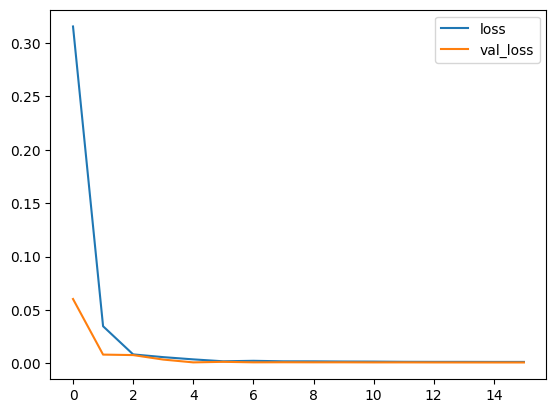

In [64]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [30]:
pred_y = model.predict(test_X)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [31]:
pred_y = scaler.inverse_transform(pred_y)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(0.006001901050348656, 7.514509164140933e-05, 0.8896001402695107)

<Axes: xlabel='Date'>

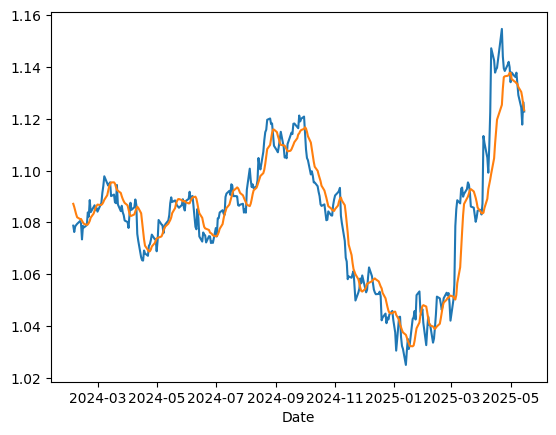

In [34]:
sns.lineplot(x=test_y.index, y=test_y.values)
sns.lineplot(x=test_y.index, y=pred_y.flatten())